# Forecasting
It seems like SARIMA model is the best. Let's compare forecasts between these five zipcodes to decide which one to invest in.

In [215]:
%reload_ext autoreload
%autoreload 2
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [216]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

import pickle

from SCRIPT.eval_tools import *

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [217]:
with open('PKL/timeseries_queens_p.pkl', 'rb') as fp:
    df = pickle.load(fp)
df.index = pd.DatetimeIndex(df.index.values, freq='infer')
df.columns = df.columns.astype(str)

In [218]:
select_zipcode = ['11101', '11693', '11692', '11694', '11103']

In [219]:
# dividing up dataframe
zip_1 = select_zipcode[0]
sel_df1 = df[zip_1]
zip_2 = select_zipcode[1]
sel_df2 = df[zip_2]
zip_3 = select_zipcode[2]
sel_df3 = df[zip_3]
zip_4 = select_zipcode[3]
sel_df4 = df[zip_4]
zip_5 = select_zipcode[4]
sel_df5 = df[zip_5]

# Get Forecast
First, I'll take forecast for each zipcode and combine them.

### zipcode 1

In [220]:
pdq = (1, 1, 1)
SPDQ = (0, 0, 1, 12)

In [221]:
sarima = SARIMAX(sel_df1, order=pdq, 
        seasonal_order=SPDQ, 
        enforce_stationarity=False, 
        enforce_invertibility=False)
sarima_model1 = sarima.fit()

In [222]:
pred1 = sarima_model1.forecast(steps = 3*12)

### zipcode 2

In [223]:
pdq = (1, 1, 1)
SPDQ = (1, 0, 1, 12)

In [224]:
sarima = SARIMAX(sel_df2, order=pdq, 
        seasonal_order=SPDQ, 
        enforce_stationarity=False, 
        enforce_invertibility=False)
sarima_model2 = sarima.fit()

In [225]:
pred2 = sarima_model2.forecast(steps = 3*12)

### zipcode 3

In [226]:
pdq = (1, 0, 1)
SPDQ = (1, 0, 1, 12)

In [227]:
sarima = SARIMAX(sel_df3, order=pdq, 
        seasonal_order=SPDQ, 
        enforce_stationarity=False, 
        enforce_invertibility=False)
sarima_model3 = sarima.fit()

In [228]:
pred3 = sarima_model3.forecast(steps = 3*12)

### zipcode 4

In [229]:
pdq = (1, 0, 0)
SPDQ = (1, 0, 1, 12)

In [230]:
sarima = SARIMAX(sel_df4, order=pdq, 
        seasonal_order=SPDQ, 
        enforce_stationarity=False, 
        enforce_invertibility=False)
sarima_model4 = sarima.fit()

In [231]:
pred4 = sarima_model4.forecast(steps = 3*12)

### zipcode 5

In [232]:
pdq = (0, 1, 1)
SPDQ = (1, 0, 1, 12)

In [233]:
sarima = SARIMAX(sel_df5, order=pdq, 
        seasonal_order=SPDQ, 
        enforce_stationarity=False, 
        enforce_invertibility=False)
sarima_model5 = sarima.fit()

In [234]:
pred5 = sarima_model5.forecast(steps = 3*12)

# Plot Forecast

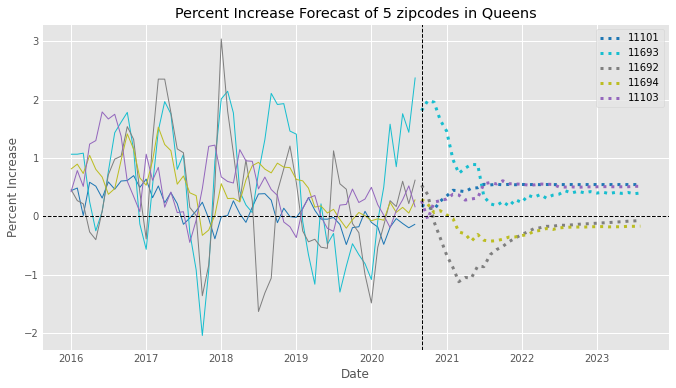

In [235]:
fig = plt.figure(figsize = (10, 6))
plt.plot(sel_df1.loc['2016-01-01':], lw = 1, color = 'tab:blue')
plt.plot(sel_df2.loc['2016-01-01':], lw = 1, color = 'tab:cyan')
plt.plot(sel_df3.loc['2016-01-01':], lw = 1, color = 'tab:gray')
plt.plot(sel_df4.loc['2016-01-01':], lw = 1, color = 'tab:olive')
plt.plot(sel_df5.loc['2016-01-01':], lw = 1, color = 'tab:purple')

plt.plot(pred1, ls = 'dotted', lw = 3, color = 'tab:blue', label = select_zipcode[0])
plt.plot(pred2, ls = 'dotted', lw = 3, color = 'tab:cyan', label = select_zipcode[1])
plt.plot(pred3, ls = 'dotted', lw = 3, color = 'tab:gray', label = select_zipcode[2])
plt.plot(pred4, ls = 'dotted', lw = 3, color = 'tab:olive', label = select_zipcode[3])
plt.plot(pred5, ls = 'dotted', lw = 3, color = 'tab:purple', label = select_zipcode[4])

plt.axvline(x='2020-09-01', lw = 1, color = 'black', ls = '--')

plt.axhline(y=0, lw = 1, color = 'black', ls = '--')
plt.xlabel('Date')
plt.ylabel('Percent Increase')
plt.title('Percent Increase Forecast of 5 zipcodes in Queens')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

Our model is forecasting that the price for 11693 (Rockaway Beach) will likely to continue to stay increasing even though the rate of price increase might not stay as high as it currently is. On the other hand, the prices for 11103 (Astoria) and 11101 (LIC) are at a bit of plateau right now, but will start to increase going forward. Given how Astoria had the trend closest to the overall Queens, these two neighborhoods will likely to follow similar growth pattern as the overall Queens. On the other hand, the forecast shows that prices for areas right around the Rockaway Beach (11694 and 11692) but not the central rockaway beach will likely to drop for a while.

# Forecast in housing price
Now let's see what these percent increase actually means in terms of average housing price.

In [236]:
with open('PKL/timeseries_queens.pkl', 'rb') as fp:
    df_price = pickle.load(fp)

In [237]:
with open('PKL/meta.pkl', 'rb') as fp:
    meta = pickle.load(fp)

In [238]:
df_price

,11375,11377,11355,11385,11373,11372,11101,11368,11354,11374,...,11411,11426,11428,11693,11004,11416,11436,11366,11363,11430
09/2003,208390.0,190189.0,224646.0,369384.0,205179.0,189710.0,294520.0,174631.0,209972.0,185902.0,...,311686.0,356138.0,365608.0,184559.0,262216.0,356086.0,265761.0,444249.0,625664.0,428425.0
10/2003,209726.0,190238.0,226034.0,374723.0,207050.0,191774.0,292991.0,175982.0,210439.0,188639.0,...,314718.0,359002.0,367721.0,184038.0,264226.0,358525.0,268318.0,448185.0,619341.0,431553.0
11/2003,211641.0,190283.0,227257.0,378695.0,208697.0,193572.0,290855.0,177822.0,211111.0,190732.0,...,317253.0,361184.0,369969.0,184704.0,265948.0,360362.0,268934.0,452559.0,617524.0,433946.0
12/2003,212473.0,192036.0,228287.0,382580.0,209701.0,195221.0,293458.0,178858.0,211884.0,191773.0,...,318464.0,363609.0,372212.0,185362.0,266114.0,361361.0,269784.0,456507.0,618045.0,435412.0
01/2004,213814.0,194239.0,230210.0,386235.0,211715.0,197293.0,294071.0,179892.0,213650.0,193394.0,...,321214.0,366752.0,375723.0,186543.0,266186.0,363118.0,271774.0,460921.0,623912.0,436372.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
04/2020,414597.0,411919.0,483333.0,687895.0,391241.0,416898.0,865383.0,379398.0,432010.0,368999.0,...,523158.0,629442.0,580122.0,319877.0,394149.0,588034.0,491062.0,898524.0,921052.0,653097.0
05/2020,413298.0,415620.0,481628.0,687495.0,389159.0,415843.0,865058.0,380423.0,432537.0,369007.0,...,527318.0,629169.0,579179.0,322601.0,392476.0,587689.0,491446.0,895101.0,921219.0,649865.0
06/2020,414035.0,417904.0,481401.0,687645.0,387163.0,411766.0,864008.0,381536.0,433402.0,370753.0,...,530998.0,630861.0,579616.0,328280.0,391072.0,588798.0,492388.0,893447.0,924190.0,646843.0
07/2020,416242.0,419951.0,480779.0,688646.0,386747.0,409472.0,862324.0,382232.0,433672.0,373755.0,...,536158.0,632717.0,580896.0,333014.0,389666.0,590890.0,493663.0,891381.0,925936.0,642703.0


In [239]:
meta

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County
...,...,...,...,...,...,...,...,...,...
30410,60758,34430,7703,Zip,NJ,NJ,Eatontown,New York-Newark-Jersey City,Monmouth County
30411,72032,34430,32511,Zip,MO,MO,Macon,NaN,Macon County
30412,69492,34430,27708,Zip,NC,NC,Durham,Durham-Chapel Hill,Durham County
30413,78801,34430,47865,Zip,IN,IN,Carlisle,Terre Haute,Sullivan County
